# The Half-edge Data Structure

In a .obj or a .off file, the geometry is stored as a list of vertices followed a list of faces. Therefore the connectivity information is stored in the faces. A half-edge data structure is an alternative to face-based data structures, which uses more memory but enables more efficient mesh operations (such as finding the one-ring of a given vertex). The facets of a halfedge mesh do not have to be three-sided - quads or larger polygons are also allowed.

In [1]:
from halfedge_mesh.halfedge_mesh import * #import a very lightweight package for half-edge data structures

The following function constructs a halfedge data structure that represents a single triangle, according to this diagram. Notice how the directions of the half-edges inside the face follow a consistent order, and opposite half-edges have opposite directions.

<div>
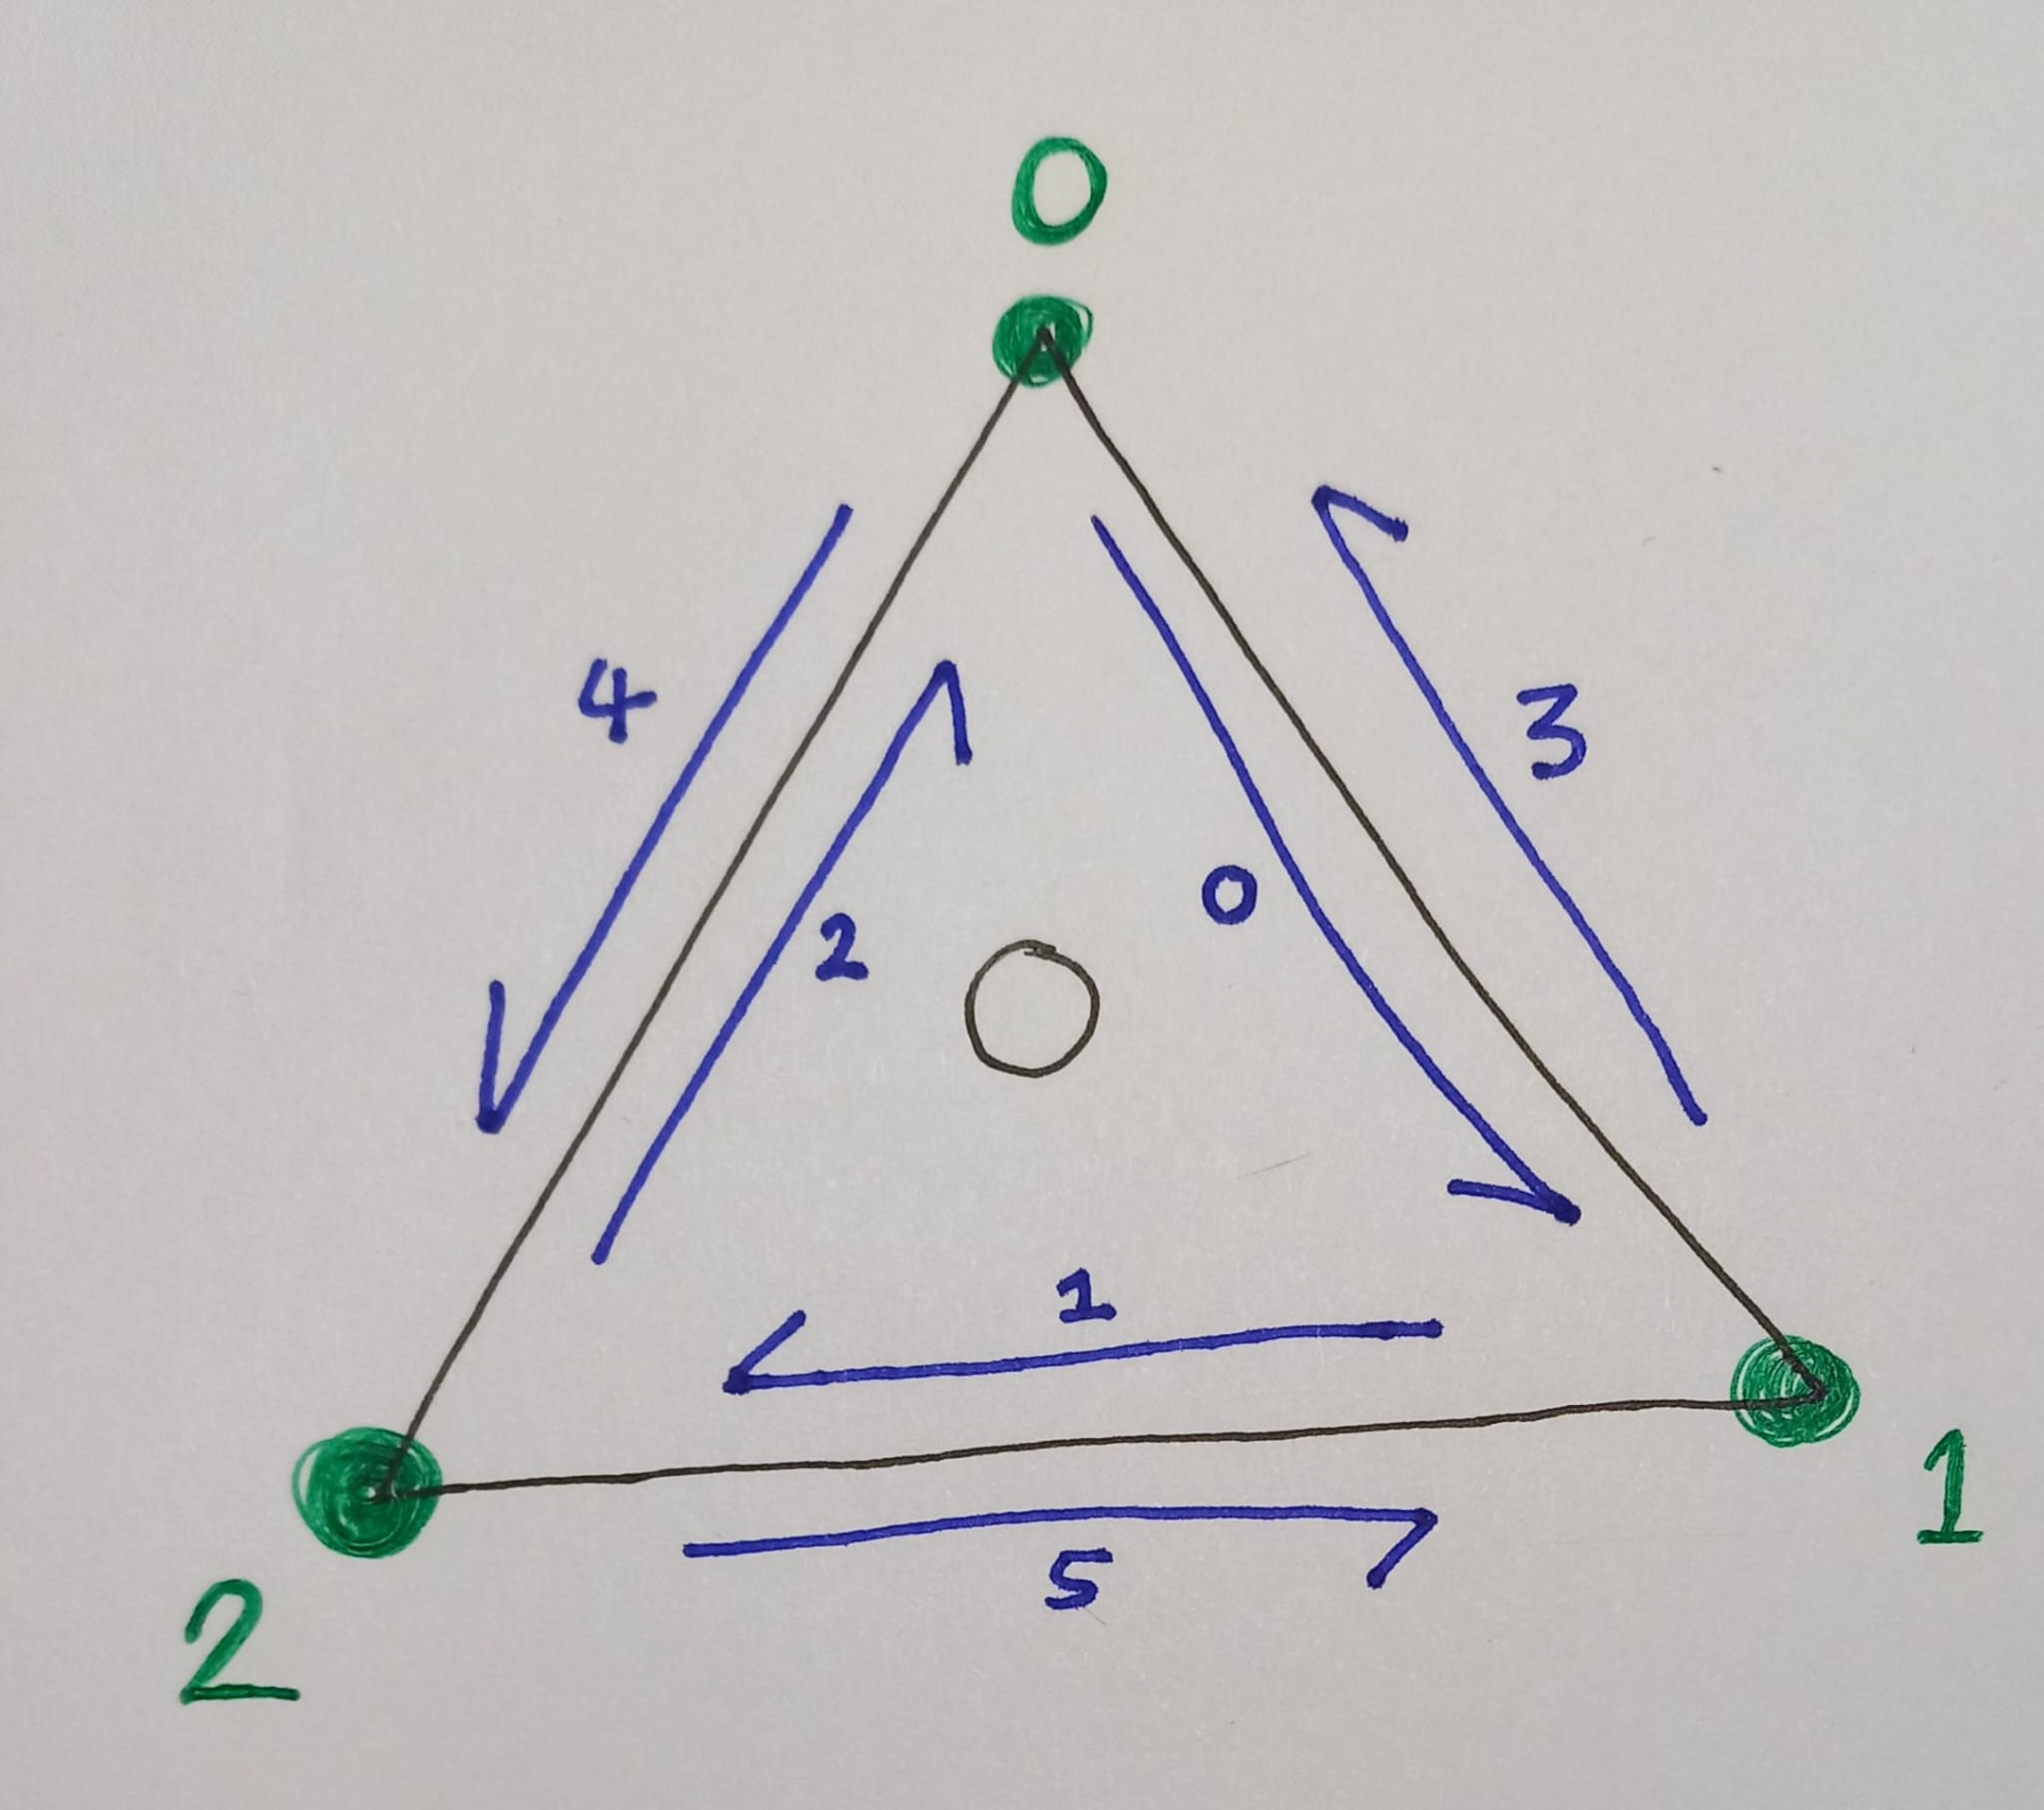
</div>



Read the following code to undertand the syntax for defining a halfedge mesh with this library.

In [2]:
def create_halfedge_triangle():
    ################### 1. Initialise ########################
    
    triangle = HalfedgeMesh() #Create a halfedge-mesh object called 'triangle'.
    triangle.update_vertices([ [1,1,1], [1,0,0], [0,1,0] ]) #Create vertices.
    triangle.facets = [ Facet(index = 0) ] #Create facets (faces, sort of).
    triangle.halfedges = [ Halfedge(index = i) for i in range(6) ] #Create halfedges (two per edge).
    
    ################## 2. Update Halfedge Connectivity ################
    
    null_facet = Facet() #We use this to assign a facet to halfedges that are on the boundary.

    triangle.halfedges[0].update(  vertex = triangle.vertices[0], next =  triangle.halfedges[1], 
                                       facet = triangle.facets[0], opposite = triangle.halfedges[3])

    triangle.halfedges[1].update(   vertex = triangle.vertices[1], next =  triangle.halfedges[2], 
                                       facet = triangle.facets[0], opposite = triangle.halfedges[5])

    triangle.halfedges[2].update(  vertex = triangle.vertices[2], next =  triangle.halfedges[0], 
                                       facet = triangle.facets[0], opposite = triangle.halfedges[4])

    triangle.halfedges[3].update(  vertex = triangle.vertices[1], next =  triangle.halfedges[4], 
                                       facet = null_facet, opposite = triangle.halfedges[0])

    triangle.halfedges[4].update(  vertex = triangle.vertices[0], next =  triangle.halfedges[5], 
                                       facet = null_facet, opposite = triangle.halfedges[2])

    triangle.halfedges[5].update(  vertex = triangle.vertices[2], next =  triangle.halfedges[3], 
                                       facet = null_facet, opposite = triangle.halfedges[1])

    ########## 3. Define Facet Connectivity ##############
    
    triangle.facets[0].update( halfedge = triangle.halfedges[0] ) #Assign one halfedge to every facet.

    ########## 4. Define Vertex Connectivity ##############
    
    triangle.vertices[0].update ( halfedge = triangle.halfedges[0] ) #Assign one halfedge to every vertex.
    triangle.vertices[1].update ( halfedge = triangle.halfedges[1] )
    triangle.vertices[2].update ( halfedge = triangle.halfedges[2] )
    
    return triangle


The library has a function to convert half-edge meshes into .off file format. Run this code, then open Meshlab and import the mesh into Meshlab to look at it.

In [3]:
triangle = create_halfedge_triangle()
triangle.write_off('my_triangle.off') #This converts the halfedge triangle into a .off file. Open it in Meshlab.

## Task 1: Construct a halfedge mesh for a tetrahedron.

 - First, draw a diagram on paper to plan out how you will define the vertices, halfedges and facets.
 - Then fill in the following function to generate a halfedge mesh for a tetrahedron.

Hint: If you are confused about how a halfedge mesh works, have a look at this interactive webpage: https://jerryyin.info/geometry-processing-algorithms/half-edge/

- To understand why the connections are defined like this, you will need to look at the image 'tetrahedron'

In [4]:
def create_halfedge_tetrahedron():
    ################### 1. Initialise ################################
    
    tetra = HalfedgeMesh() #Create a halfedge-mesh object
    tetra.update_vertices([ [1,0,-2**(-0.5)], [-1,0,-2**(-0.5)], [0,1,2**(-0.5)] , [0,-1,2**(-0.5)]]) #Create vertices
    tetra.facets = [ Facet(index=i) for i in range(4) ] 
    tetra.halfedges = [ Halfedge(index = i) for i in range(12) ] 
    
    ################## 2. Define Halfedge Connectivity ################
    
    tetra.halfedges[0].update ( vertex = tetra.vertices[0], next = tetra.halfedges[1] , facet = tetra.facets[0] ,
                               opposite = tetra.halfedges[3] )
    
    tetra.halfedges[1].update ( vertex =  tetra.vertices[1], next = tetra.halfedges[2], facet = tetra.facets[0] ,
                               opposite = tetra.halfedges[5])
    
    tetra.halfedges[2].update ( vertex =  tetra.vertices[2], next = tetra.halfedges[0], facet = tetra.facets[0] ,
                              opposite = tetra.halfedges[4]) 
    
    tetra.halfedges[3].update ( vertex = tetra.vertices[1], next = tetra.halfedges[7], facet = tetra.facets[3] ,
                              opposite = tetra.halfedges[0])
    
    tetra.halfedges[4].update ( vertex = tetra.vertices[0], next = tetra.halfedges[6], facet = tetra.facets[1], 
                               opposite = tetra.halfedges[2] ) 
    
    tetra.halfedges[5].update ( vertex = tetra.vertices[2], next = tetra.halfedges[9], facet = tetra.facets[2],
                               opposite =  tetra.halfedges[1])
    
    tetra.halfedges[6].update ( vertex = tetra.vertices[2], next = tetra.halfedges[11] , facet = tetra.facets[1],
                               opposite =  tetra.halfedges[10])
    
    tetra.halfedges[7].update ( vertex = tetra.vertices[0], next = tetra.halfedges[8], facet = tetra.facets[3],
                               opposite =  tetra.halfedges[11])
    
    tetra.halfedges[8].update ( vertex = tetra.vertices[3], next = tetra.halfedges[3], facet = tetra.facets[3],
                               opposite = tetra.halfedges[9] )

    tetra.halfedges[9].update ( vertex = tetra.vertices[1], next = tetra.halfedges[10], facet = tetra.facets[2],
                               opposite = tetra.halfedges[8] )
    
    tetra.halfedges[10].update ( vertex = tetra.vertices[3], next = tetra.halfedges[5], facet = tetra.facets[2],
                                opposite =  tetra.halfedges[6])
    
    tetra.halfedges[11].update ( vertex = tetra.vertices[3], next = tetra.halfedges[4], facet = tetra.facets[1],
                                opposite = tetra.halfedges[7] )
    
    
    ########## 3. Define Facet Connectivity ##############
    
    tetra.facets[0].update (halfedge = tetra.halfedges[0])
    tetra.facets[1].update (halfedge = tetra.halfedges[6])
    tetra.facets[2].update (halfedge = tetra.halfedges[10])
    tetra.facets[3].update (halfedge = tetra.halfedges[7])

    ########## 4. Define Vertex Connectivity ##############

    tetra.vertices[0].update (halfedge = tetra.halfedges[0])
    tetra.vertices[1].update (halfedge = tetra.halfedges[1])
    tetra.vertices[2].update (halfedge = tetra.halfedges[2])
    tetra.vertices[3].update (halfedge = tetra.halfedges[8])

    return tetra

 - Test your function below. Open the mesh file in Meshlab to check it. Does it look like a tetrahedron?

In [5]:
tetra = create_halfedge_tetrahedron()
tetra.write_off('my_tetrahedron.off') 

Note: If the mesh appears dark, it is 'inside out' - you can fix this by changing the order of the vertices, or you can use the method HalfedgeMesh.flip(), which multiplies the x-co-ordinate of every vertex by minus 1.

## Task 2: find the vertices in the one-ring of a vertex

 - Given a halfedge mesh and a starting vertex index, this function should return the pointers to all the vertices in the onering, in order.
This can be done very efficiently by exploiting the halfedge connectivity.

Hint: It can be useful to print out indices of halfedges and vertices using e.g. print(current_halfedge.index).

Hint: You can make chains of pointers to move around the graph, e.g. current_halfedge.opposite.opposite.next.vertex.halfedge.facet

As always, drawing a diagram is useful.

In [6]:
def find_onering(origin_vertex):
    
    origin_halfedge = origin_vertex.halfedge
    
    onering_vertices = []
    halfedge_list = []
    
    cur_halfedge = origin_halfedge
    while True:
        halfedge_list.append(cur_halfedge.index)#helpful for debugging
        print()
        onering_vertices.append(cur_halfedge.opposite.vertex)
        cur_halfedge = cur_halfedge.opposite.next
        if cur_halfedge == origin_halfedge:
            break
            
    #print('Halfedge traversal: ',halfedge_list)
        
    return onering_vertices
        

 - Test your code on the tetraheron and on the icosphere (download the icosphere mesh 'sphere4.off' from the github page).

 - For the tetrahedron, check your diagram. Are the onering vertices correct?

 - For the icosphere, is the number of onering vertices as you expect? (You will need to look at the mesh in Meshlab.)

In [7]:
i=0
onering = find_onering(tetra.vertices[i])#Are the onering vertices correct? Check all four vertices.
print ('onering vertices of vertex ',i,': ', str([vertex.index for vertex in onering]))




onering vertices of vertex  0 :  [1, 3, 2]


In [8]:
icosphere = HalfedgeMesh('sphere4.off') #Use the library to generate a halfedge mesh from a .off file.
i=100
onering = find_onering(icosphere.vertices[i])#Does the onering have the expected size? (look at the mesh in Meshlab).
print ('onering vertices of vertex ',i,': ', str([vertex.index for vertex in onering]))







onering vertices of vertex  100 :  [2078, 2079, 2310, 1720, 1721, 2317]


## Onering Test: Mesh Editing

If your onering function is correct, you can use it to make edits to meshes.
 - What do you expect this code to do? Open the mesh in meshlab to check.
 - If you have time, try adapting it to make different patterns. For example, you could try editing all of the vertices in the two-ring.

In [9]:
n = 42 #Magic number. Other magic numbers that make nice patterns are n=102, n=162 or n=642.

for i in range(n):
    origin_vertex = icosphere.vertices[i]
    onering = find_onering( origin_vertex )
    for vertex in onering:
        vertex.x = 1.02* vertex.x 
        vertex.y = 1.02* vertex.y 
        vertex.z = 1.02* vertex.z
    origin_vertex.x = 1.1* origin_vertex.x 
    origin_vertex.y = 1.1* origin_vertex.y 
    origin_vertex.z = 1.1* origin_vertex.z

icosphere.write_obj('edited_icosphere.obj')

## Extra Stuff

### Algorithm to Generate Halfedge Mesh from Vertices and Faces

If you finish everything else, learn how the library can automatically converts .off files into halfedge meshes.

This is the pseudocode for how we efficiently generate a halfedge mesh from a .off file. Link:
        http://stackoverflow.com/questions/15365471/initializing-half-edge-
        data-structure-from-vertices
The code assumes that the order of vertices in every face is consistent (e.g. always clockwise). See if you can work out which part would break if this assumption isn't true.

        map< pair<unsigned int, unsigned int>, HalfEdge* > Edges;

        for each face F
        {
            for each edge (u,v) of F
            {
                Edges[ pair(u,v) ] = new HalfEdge();
                Edges[ pair(u,v) ]->face = F;
            }
            for each edge (u,v) of F
            {
                set Edges[ pair(u,v) ]->nextHalfEdge to next half-edge in F
                if ( Edges.find( pair(v,u) ) != Edges.end() )
                {
                    Edges[ pair(u,v) ]->oppositeHalfEdge = Edges[ pair(v,u) ];
                    Edges[ pair(v,u) ]->oppositeHalfEdge = Edges[ pair(u,v) ];
            }
        }


24

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


22